In [1]:
import pickle
import random

import pygsti
from pygsti.circuits import Circuit
import numpy as np
from numpy import pi, sin, cos, tan, arcsin, arccos, arctan2, sqrt, exp
from numpy.linalg import norm
from numpy.random import default_rng
import matplotlib.pyplot as plt
from matplotlib import cm, colors

from mpl_toolkits.mplot3d import Axes3D

from reset import QuantumSim, prep_projector_matrices_pp
from reset import DensityMatrixOperations as rho_op
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector
from math_objects import *

In [3]:
#Crosstalk rate amplified for all parameters (2.51, for 4,2,1 SQs respectively)
CNOT_counts = [0,1,2,3,4,5,6,7]

fid_new_filtered = [[0.972192606105583, 0.9902844622404383, 0.9702347980938824, 0.9770562215720249, 0.9746080474896364, 0.984942845146819, 0.9801007155532679, 0.9746161627292931, 0.963067434122062, 0.9874037416343929, 0.975492393134948, 0.9703828060512605],
                    [0.9652734836544918, 0.9397062344526588, 0.950607996967326, 0.9262483095145132, 0.9564698032427936, 0.9429942301157277, 0.9247953107898852, 0.9482450532244338, 0.9396079260830993, 0.9707518785870712, 0.9368141958020717, 0.953229243105212],
                    [0.9556781038858666, 0.9568568675323328, 0.9735310039128587, 0.963294564783306, 0.961571871636346, 0.9675452357486558, 0.9437619614318624, 0.9599192689207396, 0.9667590792237751, 0.9448567972683811, 0.9547599681520254, 0.9749347316485256],
                    [0.8824869984842763, 0.8554424610573867, 0.8151863679579111, 0.8008313454412861, 0.8592728143567061, 0.920495134721272, 0.8606246206787382, 0.8767255462538923, 0.8656127973663685, 0.8718006186760626, 0.8582722808227589, 0.8603655315168958],
                    [0.9229235008798307, 0.8462647334523088, 0.8581023398050747, 0.9030879992491525, 0.9219995993088114, 0.9172582280944546, 0.8833492404565481, 0.8471020486517022, 0.8624512469266788, 0.9387044842373136, 0.9120316857939963, 0.9126188007836706],
                    [0.801871201571847, 0.7974811075227995, 0.8580288733334844, 0.700032068304959, 0.7608068246301425, 0.7560582594681672, 0.7578455647954558, 0.8006482143387816, 0.8121937886232145, 0.8505635090179708, 0.8002582415577939, 0.8010762585065364],
                    [0.8869755492859934, 0.8042479493263656, 0.8417970404542792, 0.8539069498735727, 0.8271105998636664, 0.87568846419496, 0.8839224731875153, 0.8430101428674355, 0.8111430917407626, 0.8472068750578381, 0.8749203086958239, 0.8230648192732408],
                    [0.7588029656446531, 0.8339865043539476, 0.7449342510806914, 0.8206010333401755, 0.7766648804712506, 0.8910166578912877, 0.7213826023791783, 0.7107317452804588, 0.741083722474742, 0.7928336620644313, 0.755326861970392, 0.7154318764094956]
                    ]

fid_new_unfiltered = [[0.9733428450980973, 0.9915317701004549, 0.9688262234225441, 0.9765332645658602, 0.9749287105604585, 0.9831370227810982, 0.9803277891745239, 0.9752073987052499, 0.9630375746301918, 0.9877153105473531, 0.9744480389235833, 0.9710925528944354],
                      [0.9341782355783215, 0.8802751636251808, 0.9006666666666665, 0.8961048235324518, 0.8758735444201776, 0.9158433673081731, 0.8968168855395245, 0.8988192243330937, 0.9123947050059568, 0.9454627889099962, 0.8888102759031262, 0.8976068451975648],
                      [0.8478320551695189, 0.8326666666666673, 0.8265068080933586, 0.81060483357079, 0.8366666666666671, 0.8507463370639494, 0.8567906437395765, 0.802590956717343, 0.884417185180846, 0.8305345610190626, 0.7901391770309001, 0.8780000000000008],
                      [0.7406666666666666, 0.7153333333333344, 0.6899478316784426, 0.6455462479183366, 0.7219999999999998, 0.8460000000000006, 0.7141906616568626, 0.7953916301351944, 0.6452298094551505, 0.7326666666666668, 0.7280000000000001, 0.7460000000000016],
                      [0.8006666666666677, 0.6096150996260215, 0.6219999999999998, 0.6780000000000005, 0.7697611080133318, 0.8293980598172679, 0.6120171570301994, 0.6723545901485022, 0.6088669704712735, 0.7585330032010642, 0.6840000000000004, 0.7206666666666659],
                      [0.7013333333333331, 0.5918372896238188, 0.7613333333333341, 0.5553333333333339, 0.586, 0.6906666666666653, 0.6203311365017445, 0.6685337902865306, 0.6626666666666665, 0.7570056216090636, 0.5766666666666656, 0.652666666666667],
                      [0.7258214040956428, 0.6126666666666662, 0.6120000000000003, 0.6911366230699003, 0.528, 0.658666666666667, 0.7720000000000005, 0.6006666666666663, 0.5560000000000003, 0.6648565893280673, 0.7519999999999989, 0.6053333333333333],
                      [0.6579999999999986, 0.7586666666666657, 0.6666666666666661, 0.6820713132698328, 0.5826666666666664, 0.8512175556181878, 0.616144880965297, 0.529738775509621, 0.5559999999999998, 0.617999999999999, 0.6173672435175546, 0.5553333333333329]
                      ]

fid_old_filtered = [[0.9770044712545971, 0.9907877209234216, 0.986870802915532, 0.9896172197843114, 0.977902477219793, 0.9845163949283832, 0.965341817151564, 0.997165140232105, 0.9747667641518486, 0.9863931251868301, 0.9736887565007087, 0.9841032054286403],
                    [0.9356873864239666, 0.9456775810033258, 0.9398322789874141, 0.9497244515812312, 0.9530920157417733, 0.9417727887846626, 0.9463234126725044, 0.9331197882873759, 0.9339264805790727, 0.9508589239773434, 0.9671628272389682, 0.9419796216051457],
                    [0.9173605572715602, 0.9158429824915619, 0.896388567898673, 0.87639392388019, 0.9244162783777774, 0.9404386563125784, 0.9024781255723192, 0.9418825377737836, 0.9391370255971123, 0.9363168731946397, 0.9281726470771245, 0.8977310642852414],
                    [0.9198471100721715, 0.907428945995405, 0.9561538537128778, 0.8865208679877641, 0.9091809141366364, 0.9060458642832439, 0.945816359755255, 0.8639785976994175, 0.9018346823869503, 0.9262175139333659, 0.8870967532303818, 0.920959469164591],
                    [0.9358180045055273, 0.9152571002834408, 0.9389455215007181, 0.9278015977569888, 0.9138019388932506, 0.8714963136695164, 0.8993139498939988, 0.9184362290617547, 0.9141248723095153, 0.8814334142419897, 0.9208172211188694, 0.8934364601092213],
                    [0.8890128519487719, 0.9496354853292961, 0.9002212813087225, 0.915936147967914, 0.9173783920422248, 0.9371659181251839, 0.9372704876015285, 0.915480430625087, 0.9642590584402608, 0.936099913352361, 0.9029963866405905, 0.9225168800141411],
                    [0.9435932991893429, 0.9711994532519019, 0.9579278426277515, 0.9288503217416528, 0.926177971064037, 0.9430343254041056, 0.938811860128117, 0.937976833865835, 0.9233509641999201, 0.9339574449925974, 0.9014217294835076, 0.9457344198114658],
                    [0.9212778465427289, 0.9285666337280934, 0.9679969874107142, 0.9365377613246479, 0.9458573004154172, 0.9306033155332971, 0.9189583694961225, 0.9290124206953816, 0.9507296824419111, 0.9428436423582219, 0.9480603778910486, 0.8937924993380908]
                    ]

fid_old_unfiltered = [[0.9770044712545971, 0.9907877209234216, 0.986870802915532, 0.9896172197843114, 0.977902477219793, 0.9845163949283832, 0.965341817151564, 0.997165140232105, 0.9747667641518486, 0.9863931251868301, 0.9736887565007087, 0.9841032054286403],
                      [0.9192874417094944, 0.9363537910533286, 0.9324269603435053, 0.9334639598642428, 0.944039275551871, 0.9313450471585154, 0.9302802151535908, 0.9269508919240848, 0.9220278564606972, 0.9364130208495038, 0.9547665884616738, 0.931465930381193],
                      [0.874894760905475, 0.8484316918247773, 0.8434813435073727, 0.7819999999999991, 0.8730720592590472, 0.8900000000000012, 0.8412860229662895, 0.8986479708017374, 0.8867745127317656, 0.8852614462152888, 0.8837330823375821, 0.8353333333333341],
                      [0.776867099092258, 0.7288994498354948, 0.871339436937423, 0.7200000000000003, 0.7806666666666681, 0.7540000000000001, 0.8486357609255326, 0.7119056514139381, 0.7310432297534478, 0.809212579327063, 0.7121795376827195, 0.7866666666666684],
                      [0.7799999999999999, 0.7006666666666667, 0.8171821894052977, 0.7779999999999997, 0.6870622624870983, 0.6528335005626853, 0.6910882724505123, 0.7013333333333327, 0.7433051721978581, 0.6437323949940563, 0.7966666666666664, 0.6839999999999995],
                      [0.6325273204310058, 0.7033232139331751, 0.5546030273434666, 0.5447178207935905, 0.7166666666666663, 0.6472667384541648, 0.7699999999999985, 0.6313333333333332, 0.6520000000000004, 0.6766666666666667, 0.6579999999999991, 0.6040281622033192],
                      [0.6860020319723821, 0.8053333333333323, 0.6024352935375401, 0.5973333333333337, 0.7279999999999999, 0.5799999999999998, 0.5946666666666656, 0.5879999999999994, 0.6259999999999992, 0.7194654782062675, 0.5580000000000003, 0.6482032866097608],
                      [0.5586666666666666, 0.5572523498462274, 0.7559999999999985, 0.5286666666666657, 0.7013333333333335, 0.6286666666666668, 0.5579999999999997, 0.595716137248963, 0.5721320343559646, 0.5599999999999996, 0.7980349902601085, 0.542374675043084]
                      ]

fid_new_filtered_mean = np.mean(fid_new_filtered, axis=1)
fid_new_filtered_std = np.std(fid_new_filtered, axis=1)/np.sqrt(12)

fid_new_unfiltered_mean = np.mean(fid_new_unfiltered, axis=1)
fid_new_unfiltered_std = np.std(fid_new_unfiltered, axis=1)/np.sqrt(12)

fid_old_filtered_mean = np.mean(fid_old_filtered, axis=1)
fid_old_filtered_std = np.std(fid_old_filtered, axis=1)/np.sqrt(12)

fid_old_unfiltered_mean = np.mean(fid_old_unfiltered, axis=1)
fid_old_unfiltered_std = np.std(fid_old_unfiltered, axis=1)/np.sqrt(12)

### error parameters amplification factor for odd(1,3,5..) even(2,6..) even(4...) are different (2.51, ) respectively
### this is to make sure the total rotation picked up by GHZ state is as close to pi as possible
### the small change in the factor do not impact the optimal resetting frequency (4 layers per reset) when applying old strategy 

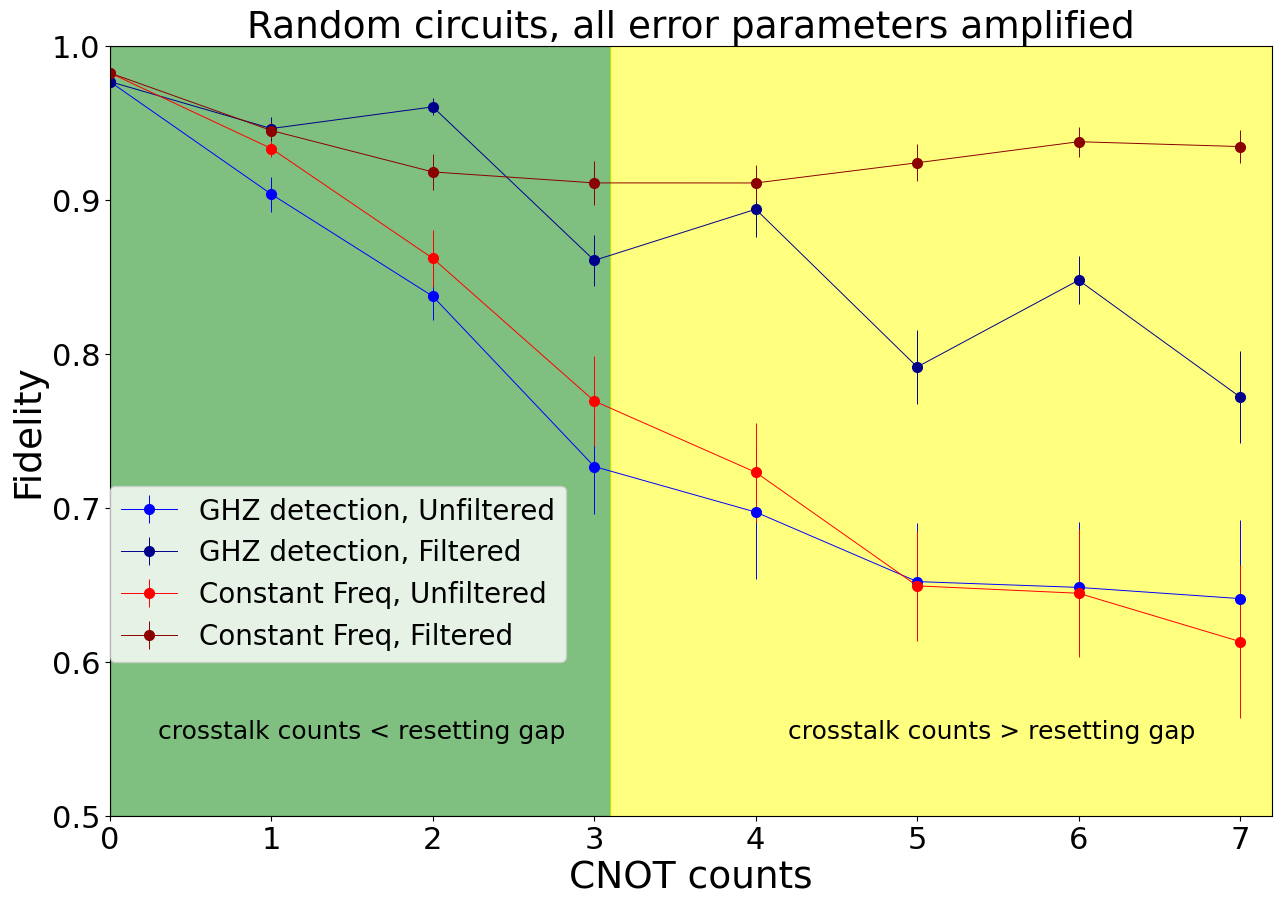

In [4]:
#plt.style.use('classic')
fig, ax = plt.subplots(figsize = (15,10))

ax.errorbar(CNOT_counts, fid_new_unfiltered_mean, yerr=2*np.array(fid_new_unfiltered_std), label='GHZ detection, Unfiltered', marker='o', linewidth=0.7, markersize=7, color='blue')
ax.errorbar(CNOT_counts, fid_new_filtered_mean, yerr=2*np.array(fid_new_filtered_std), label='GHZ detection, Filtered', marker='o', linewidth=0.7, markersize=7, color='darkblue')

ax.errorbar(CNOT_counts, fid_old_unfiltered_mean, yerr=2*np.array(fid_old_unfiltered_std), label='Constant Freq, Unfiltered', marker='o', linewidth=0.7, markersize=7, color='red')
ax.errorbar(CNOT_counts, fid_old_filtered_mean, yerr=2*np.array(fid_old_filtered_std), label='Constant Freq, Filtered', marker='o', linewidth=0.7, markersize=7, color='darkred')

#ax.axvline(x=4.2, color='black')
ax.axvspan(0, 3.1, alpha=0.5, color='green')
ax.axvspan(3.1, 7.2, alpha=0.5, color='yellow')
ax.annotate('crosstalk counts < resetting gap', (0.3,0.55), size=18)
ax.annotate('crosstalk counts > resetting gap', (4.2,0.55), size=18)
ax.legend(loc=(0, 0.2), fontsize=20)
#ax.grid()
#ax.set_xticks(list(range(1,grover_iterations+1)))
ax.set_xlim(0,7.2)
ax.set_ylim([0.5,1])
ax.set_title(r'Random circuits, all error parameters amplified', fontsize=27)# origin=0,1, $DQ\in\{4,7\}, SQ\in\{2,3,5,8\}$
ax.tick_params(labelsize=22)
ax.set_xlabel("CNOT counts",fontsize=27)
ax.set_ylabel("Fidelity",fontsize=27)

fig.savefig('figures/all error parameters amplified random circuits.pdf', dpi=300, bbox_inches="tight")

In [5]:
#Crosstalk rate amplified for H-single parameter only (2.51, for 4,2,1 SQs respectively)
CNOT_counts = [0,1,2,3,4,5,6,7]

fid_new_filtered = [[0.982230579006047, 0.9860889149924201, 0.9875813649898557, 0.982149470238858, 0.9949512546518585, 0.9842748004215346, 0.979803008888326, 0.9738310833425776, 0.981191948555617, 0.977970027327465, 0.9849399253957675, 0.97109282301306],
                    [0.9578416952897267, 0.9417958118554173, 0.960912816682167, 0.9620930619096514, 0.9680697604030558, 0.9895188623041419, 0.9803120504358375, 0.9473793115381972, 0.970118475925037, 0.9696503762685151, 0.9623622884834021, 0.9796459212638938],
                    [0.9522677855506878, 0.9643972154510532, 0.9907473782751037, 0.9803201948535805, 0.9525233825354248, 0.9278840064280968, 0.9812563176205005, 0.9710811109704179, 0.9608112293283444, 0.9780300368123845, 0.9571419569937911, 0.9694235199252794],
                    [0.8958464763880976, 0.906892183570436, 0.9391920492580147, 0.9200039577362716, 0.9519516297710243, 0.9363973847191192, 0.930498070194258, 0.9111497432587371, 0.9489552389233975, 0.9128200769076908, 0.9222082992534442, 0.9323122693958302],
                    [0.9698612958244481, 0.9100772152499779, 0.9435197158065309, 0.9506186390759003, 0.9161302045816062, 0.959548716862621, 0.9372591013121521, 0.9684194726828002, 0.9455846677643442, 0.96683749711423, 0.959977204892515, 0.9374410574628358],
                    [0.8789355544136923, 0.9242947047489329, 0.9138744300544672, 0.9234365425459403, 0.9099270594367481, 0.8779271345158257, 0.8718761629951752, 0.9277187370581208, 0.894675125033422, 0.947467379076832, 0.9167913812657882, 0.877922425697504],
                    [0.9071337370330965, 0.9169383856544924, 0.9082434208618432, 0.934275166965833, 0.9598991168108038, 0.948947695757808, 0.9133399526419542, 0.9647548099586827, 0.9384953284020273, 0.936618501924662, 0.9671647795806197, 0.945083520363333],
                    [0.8939564492540709, 0.8820366458384222, 0.8602773825633674, 0.9295908220028988, 0.9017142606393023, 0.8428451953581833, 0.8770511693893037, 0.8969116674698057, 0.8297957693419034, 0.8472811886875319, 0.8575215782440941, 0.9022768889535411]
                    ]

fid_new_unfiltered = [[0.9828825812090831, 0.985434472958478, 0.9870116462955365, 0.9822704741343418, 0.994993506456495, 0.983439570747127, 0.9803894288040103, 0.9741572658843205, 0.9822246931964712, 0.9791898759772614, 0.9845439089915973, 0.9725558056679386],
                      [0.8962417148942015, 0.8903628321822562, 0.9076550821850371, 0.8846261274011562, 0.9016923101918, 0.9379227115777885, 0.9190267047439967, 0.9095855814375102, 0.9132029951552498, 0.9113737394698123, 0.8784531070088932, 0.9181460884043997],
                      [0.8126175966854638, 0.8353333333333335, 0.797922123819628, 0.8959505415927747, 0.8062080546530126, 0.8692754934929441, 0.8743260112682478, 0.896676718681742, 0.8580785649526701, 0.8549763983984929, 0.8446279452891248, 0.8755309776504371],
                      [0.8123721257832528, 0.6706666666666659, 0.7440000000000001, 0.6554701294725881, 0.7428375367933779, 0.8298482653169328, 0.718924895904143, 0.7546666666666669, 0.7442789317629863, 0.7459999999999982, 0.7399999999999997, 0.8290164896408627],
                      [0.6859999999999999, 0.7611408605755278, 0.800414318735094, 0.7692102448427663, 0.7538233817144572, 0.6616408100052898, 0.5985151075251449, 0.7393333333333343, 0.8115879148691897, 0.8385321498943187, 0.8519344523080951, 0.6019999999999994],
                      [0.700561565807569, 0.7619999999999989, 0.6999999999999991, 0.5886666666666673, 0.7739999999999998, 0.6280316380884559, 0.5239999999999989, 0.7529838325272054, 0.5937716446627535, 0.7279358543814942, 0.7800759953859283, 0.685333333333333],
                      [0.6629178447227574, 0.5312839823968696, 0.4934150121846313, 0.5586595420100238, 0.6978457700635382, 0.6825641892080595, 0.5907505688038702, 0.7757956495967516, 0.5610375198772735, 0.5906666666666671, 0.6966936894246141, 0.6394863659010369],
                      [0.6133864388810064, 0.7918535139796862, 0.6723601397199166, 0.9062936712599265, 0.6925247615643495, 0.5319208264014844, 0.5299422685823997, 0.5492988764030159, 0.5842129910221925, 0.6148010819142762, 0.5459999999999998, 0.6810928945636517]
                      ]

fid_old_filtered = [[0.9813588017666848, 0.9901279357795416, 0.9752035203120963, 0.9779658458579303, 0.9753678423331619, 0.9701581485045149, 0.9782539054154371, 0.9918656521014988, 0.9782794869741671, 0.9788101261881446, 0.9583784871484423, 0.9716312699150524],
                    [0.9199788231324917, 0.9145327433207832, 0.9328381535550077, 0.9223111790197809, 0.923406322757413, 0.9197579377544404, 0.9108904245140732, 0.9158752225937875, 0.9248503476568548, 0.9328605679770164, 0.927866181804126, 0.9224861499286536],
                    [0.8992905675406699, 0.8908866536966258, 0.9163539657817622, 0.8836019084951663, 0.9083193543912306, 0.8751915961337171, 0.8461465808673, 0.9051562061303174, 0.9266504784670164, 0.8559762006564187, 0.9275097255475947, 0.9074737382688718],
                    [0.840828586004208, 0.8305559353490817, 0.8861331312602567, 0.8479507600913019, 0.8628592917541638, 0.8906036224069671, 0.8992662598023895, 0.9455104188329705, 0.868009409337295, 0.8737865191730985, 0.8574601376657681, 0.8493543540913597],
                    [0.9136860759439115, 0.9262168573777958, 0.9480798076356673, 0.8487778137353292, 0.9145328872141726, 0.8875175144510734, 0.8989414300633258, 0.9021043235337991, 0.8952734026222672, 0.9155295574102442, 0.9243284686922154, 0.9180215127696907],
                    [0.9358265637967881, 0.9412058757717817, 0.9484420582267348, 0.941283308093454, 0.959244140885649, 0.9595598447668869, 0.9097436347247676, 0.9446056538678982, 0.9605163938098195, 0.9217936560659087, 0.9407471801576051, 0.9364322557381026],
                    [0.9454277272548597, 0.9785850950899767, 0.9458637997861101, 0.9540467170181807, 0.9726739221497611, 0.9627396281964212, 0.9268951593599818, 0.9383662748240573, 0.9631862509211138, 0.9432785576540034, 0.9422616637812731, 0.9703917292346094],
                    [0.965926783735535, 0.9625803922320301, 0.9704284022590991, 0.9587321906349671, 0.959332511238902, 0.9664996570281621, 0.9746486864456373, 0.9679376121710728, 0.9971085394612434, 0.954799688652485, 0.9630965297172017, 0.9955363300218354]
                    ]

fid_old_unfiltered = [[0.9813588017666848, 0.9901279357795416, 0.9752035203120963, 0.9779658458579303, 0.9753678423331619, 0.9701581485045149, 0.9782539054154371, 0.9918656521014988, 0.9782794869741671, 0.9788101261881446, 0.9583784871484423, 0.9716312699150524],
                      [0.9116236109320233, 0.8984641486430204, 0.9314453113346064, 0.9174136332769743, 0.9114961447605843, 0.9025602910181272, 0.9027532915949346, 0.9069534109637407, 0.9256214921733491, 0.9260565510114367, 0.9177542705360168, 0.9138906951269503],
                      [0.8360000000000012, 0.8320826145279563, 0.8986350546571145, 0.8251225025943268, 0.8597461980275871, 0.8171850934452684, 0.7976488643590673, 0.8630206556720966, 0.8947016814211671, 0.8192715801876594, 0.8686666666666664, 0.8571909817648623],
                      [0.6571858582251274, 0.6174284989122463, 0.7219735559945178, 0.6978970788918657, 0.7013002401419623, 0.7553333333333332, 0.7626013718799524, 0.8512589099623086, 0.7450207306777925, 0.7215285197742662, 0.6689317215762058, 0.6919999999999995],
                      [0.659234116002762, 0.7573333333333336, 0.8386107412251274, 0.604590944005934, 0.6719525466557382, 0.6404556696491867, 0.6948775137318596, 0.7553580955705556, 0.6547225825768815, 0.7793333333333334, 0.7500224142224186, 0.7106666666666671],
                      [0.5588708697048834, 0.5380000000000004, 0.7400241354064332, 0.5800000000000003, 0.7646666666666673, 0.6070754676944374, 0.5483502884254441, 0.7159999999999989, 0.6799999999999997, 0.6254284989122462, 0.661333333333333, 0.8206378114614803],
                      [0.5963770559347285, 0.8490663239885646, 0.5264515586927927, 0.5897696492555968, 0.6978412823618982, 0.5248266304409408, 0.6178494466531312, 0.6537666466795613, 0.5577405307909895, 0.5290274218772656, 0.5823746750430827, 0.5067970059074565],
                      [0.6326627527710932, 0.7369041143109694, 0.5260971114040158, 0.5682447477617234, 0.6315605209063575, 0.5467224668120405, 0.5815035214273852, 0.7285535513423713, 0.6903207500268074, 0.5257409229081625, 0.5419117813949729, 0.7333170252898891]
                      ]


fid_new_filtered_mean = np.mean(fid_new_filtered, axis=1)
fid_new_filtered_std = np.std(fid_new_filtered, axis=1)/np.sqrt(12)

fid_new_unfiltered_mean = np.mean(fid_new_unfiltered, axis=1)
fid_new_unfiltered_std = np.std(fid_new_unfiltered, axis=1)/np.sqrt(12)

fid_old_filtered_mean = np.mean(fid_old_filtered, axis=1)
fid_old_filtered_std = np.std(fid_old_filtered, axis=1)/np.sqrt(12)

fid_old_unfiltered_mean = np.mean(fid_old_unfiltered, axis=1)
fid_old_unfiltered_std = np.std(fid_old_unfiltered, axis=1)/np.sqrt(12)

### error parameters amplification factor for odd(1,3,5..) even(2,6..) even(4...) are different (2.51, ) respectively
### this is to make sure the total rotation picked up by GHZ state is as close to pi as possible
### the small change in the factor do not impact the optimal resetting frequency (4 layers per reset) when applying old strategy 

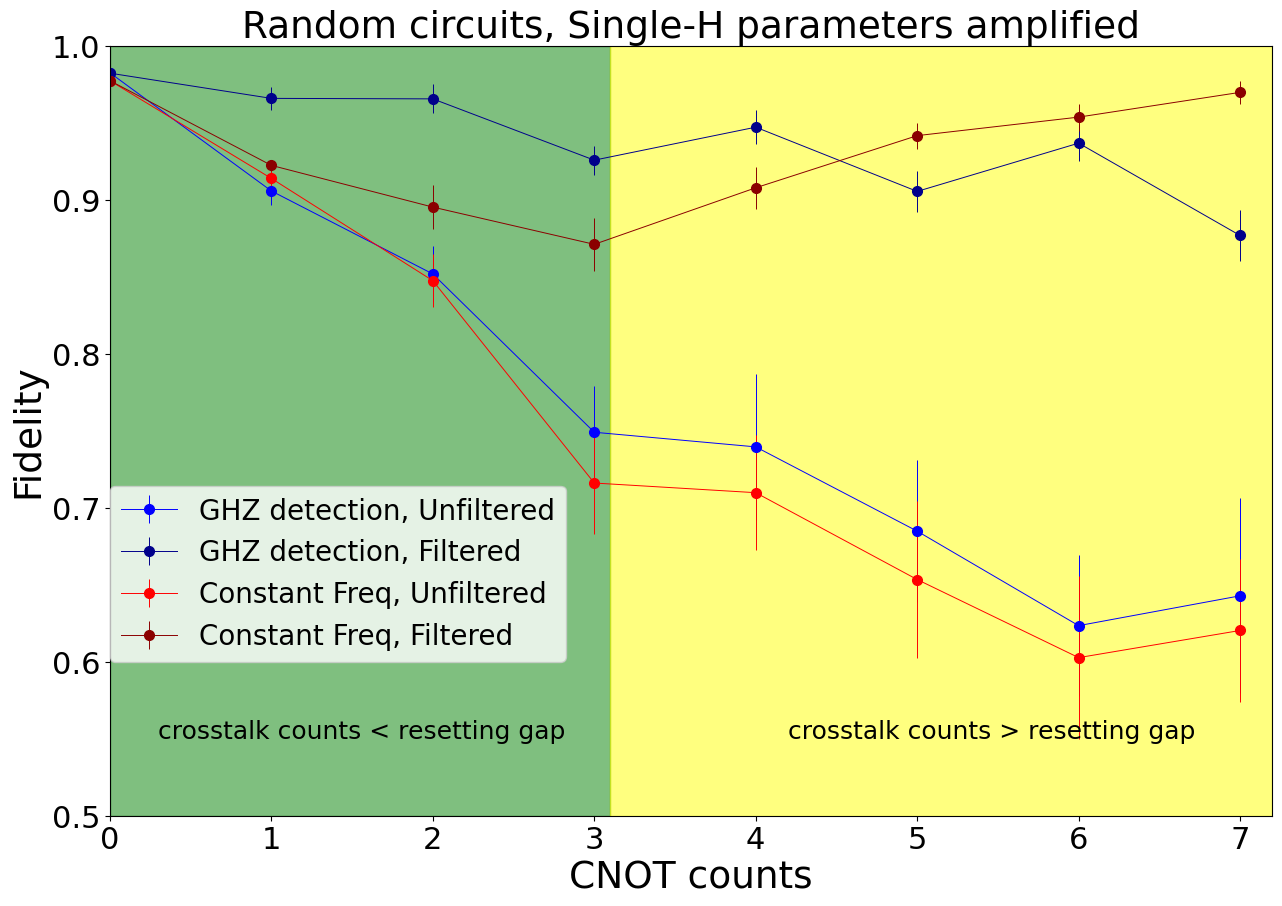

In [7]:
#plt.style.use('classic')
fig, ax = plt.subplots(figsize = (15,10))

ax.errorbar(CNOT_counts, fid_new_unfiltered_mean, yerr=2*np.array(fid_new_unfiltered_std), label='GHZ detection, Unfiltered', marker='o', linewidth=0.7, markersize=7, color='blue')
ax.errorbar(CNOT_counts, fid_new_filtered_mean, yerr=2*np.array(fid_new_filtered_std), label='GHZ detection, Filtered', marker='o', linewidth=0.7, markersize=7, color='darkblue')

ax.errorbar(CNOT_counts, fid_old_unfiltered_mean, yerr=2*np.array(fid_old_unfiltered_std), label='Constant Freq, Unfiltered', marker='o', linewidth=0.7, markersize=7, color='red')
ax.errorbar(CNOT_counts, fid_old_filtered_mean, yerr=2*np.array(fid_old_filtered_std), label='Constant Freq, Filtered', marker='o', linewidth=0.7, markersize=7, color='darkred')

#ax.axvline(x=4.2, color='black')
ax.axvspan(0, 3.1, alpha=0.5, color='green')
ax.axvspan(3.1, 7.2, alpha=0.5, color='yellow')
ax.annotate('crosstalk counts < resetting gap', (0.3,0.55), size=18)
ax.annotate('crosstalk counts > resetting gap', (4.2,0.55), size=18)
ax.legend(loc=(0, 0.2), fontsize=20)
#ax.grid()
#ax.set_xticks(list(range(1,grover_iterations+1)))
ax.set_xlim(0,7.2)
ax.set_ylim([0.5,1])
ax.set_title(r'Random circuits, Single-H parameters amplified', fontsize=27) # origin=0,1, $DQ\in\{4,7\}, SQ\in\{2,3,5,8\}$
ax.tick_params(labelsize=22)
ax.set_xlabel("CNOT counts",fontsize=27)
ax.set_ylabel("Fidelity",fontsize=27)

fig.savefig('figures/single H amplified random circuits.pdf', dpi=300, bbox_inches="tight")